# Optimización usando SciPy

## Máximos y Mínimos usando el método BFGS (Broyden–Fletcher–Goldfarb–Shanno)

In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

- Definimos la función: $f(x) = x^2+10\sin(x)$

In [34]:
def f(x):
    return x**2 + 10*np.sin(x)

In [35]:
x = np.linspace(-10, 10, 51)
# x

In [36]:
y = f(x)
# y

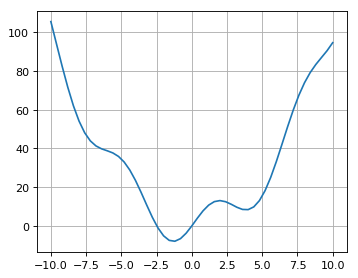

In [44]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.grid(True)
plt.show()

In [45]:
import scipy.optimize as opt

- Encuentre un mínimo de la función `f(x)` usando el método BFGS (Broyden–Fletcher–Goldfarb–Shanno), a partir de un punto inicial `x0 = 0`.

In [46]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Función objetivo a minimizar.
              x0=0,  # Estimación inicial.
              maxiter=2000,  # Número máximo de iteraciones para realizar.
              full_output=True)  # Retorna xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg.

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [47]:
xopt

array([-1.30644012])

In [48]:
fopt

-7.945823375615215

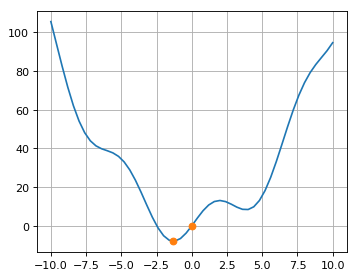

In [49]:
x0 = 0
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid(True)
plt.show()

- ¿Qué sucede si comenzamos en x0 = 6?

In [50]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Función objetivo a minimizar.
              x0=6,  # Estimación inicial.
              maxiter=2000,  # Número máximo de iteraciones para realizar.
              full_output=True)  # Retorna fopt, func_calls, grad_calls, y warnflag en adición a xopt.

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


In [51]:
xopt

array([ 3.83746709])

In [52]:
fopt

8.31558557947746

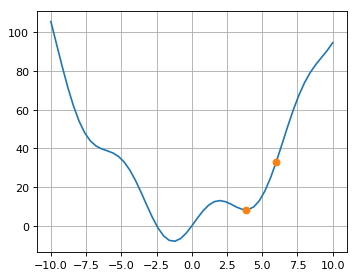

In [53]:
x0=6
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid(True)
plt.show()

- Encuentre el mínimo global utilizando el método basinhopping.

In [54]:
res = \
    opt.basinhopping(f, 
                     x0=6, 
                    niter = 200,
                     T=1,  # El parámetro de “temperatura”
                     stepsize=2)  # Tamaño inicial del paso
res

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08577905]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-1.30644])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 3855
                        nit: 200
                       njev: 1285
                          x: array([-1.30644])

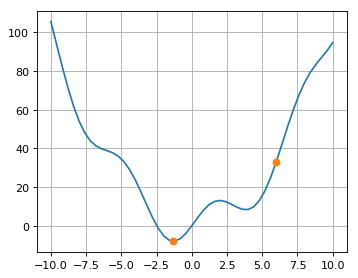

In [55]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, res.x], [f(x0), res.fun], 'o')
plt.grid(True)
plt.show()

## Resolviendo Ecuaciones

- Resuelve la ecuación $f(x)=x^2+10\sin(x)=0$.

In [56]:
x0 = 6
xopt = opt.fsolve(f, x0)  # Encuentra una raíz partiendo del valor inicial x0
xopt

array([ 0.])

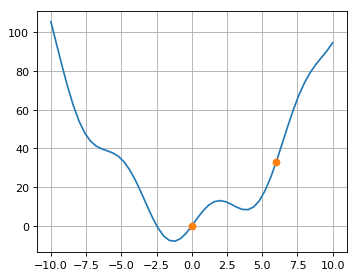

In [57]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid(True)
plt.show()

In [58]:
x0 = -6
xopt = opt.fsolve(f, x0)  # Encuentra una raíz partiendo del valor inicial x0
xopt

array([-2.47948183])

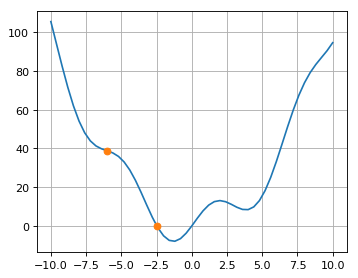

In [59]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid(True)
plt.show()

### Ajustando de curvas

- Ajustar una curva es un procedimiento para encontrar la curva de mejor ajuste para un conjunto de puntos dado minimizando la suma de los cuadrados de los desplazamientos ("los residuos") de los puntos de la curva.
<img src="curve_fitting_1.png" alt="Curve Fitting 1" style="width: 150px;"/>
<img src="curve_fitting_2.png" alt="Curve Fitting 2" style="width: 150px;"/>
<img src="curve_fitting_3.png" alt="Curve Fitting 3" style="width: 150px;"/>

In [60]:
# x

In [61]:
# y

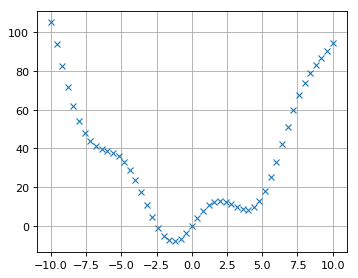

In [62]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
# plt.plot(x, y)
plt.grid(True)
plt.show()

In [63]:
y_noise = f(x) + 5*np.random.randn(x.size)  # Le añadiremos algo de ruido aleatorio
                                            # Devuelva una muestra (o muestras) de la distribución "normal estándar".
# y_noise

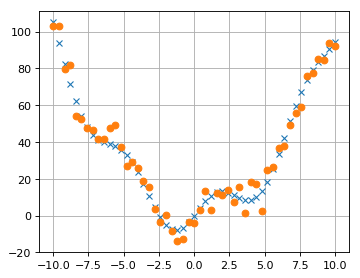

In [64]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.plot(x, y_noise, 'o')
plt.grid(True)
plt.show()

- Ajustaremos la función $f_2(x)=a x^2+b \sin(x)$ determinando los valores óptimos de los coeficientes `a` y `b`.

In [65]:
# Definimos la función con los parámetros de ajuste "a" y "b"
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [66]:
guess = [2, 2]  # Valores inicial propuestos para a y b, respectivamente
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([ 1.00858717,  9.66971205])

In [67]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
# y_fit

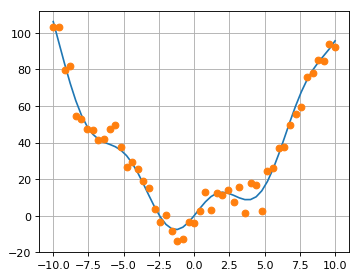

In [68]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y_fit)
plt.plot(x, y_noise, 'o')
plt.grid(True)
plt.show()

- Comparemos la función original con la ajustada

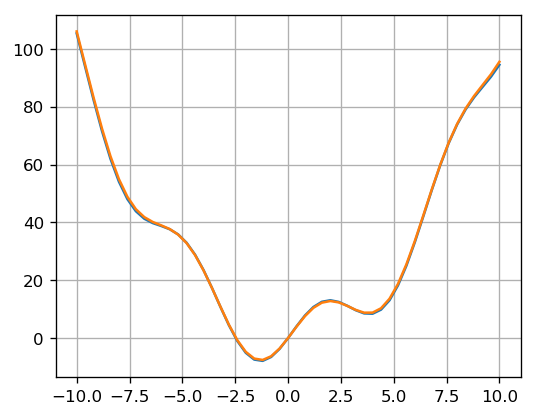

In [69]:
fig = plt.figure(figsize=(5, 4), dpi=120)
plt.plot(x, y)
plt.plot(x, y_fit)
plt.grid(True)
plt.show()